In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron


Accuracy on the test set: 100.00%


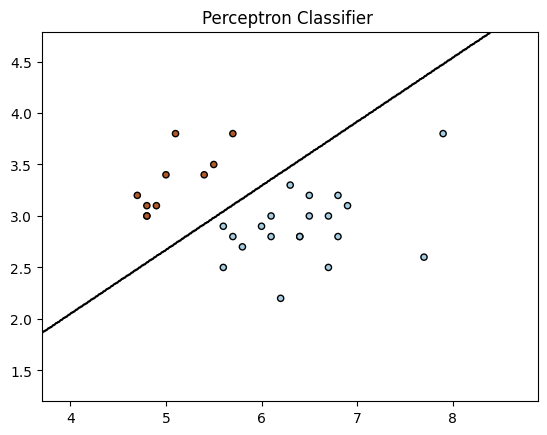

In [ ]:

class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=100):
        self.weights = np.zeros(input_size + 1)  # +1 for the bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]  # w*x + b
        return 1 if summation > 0 else 0

    def train(self, training_data, labels):
        for epoch in range(self.epochs):
            for inputs, label in zip(training_data, labels):
                prediction = self.predict(inputs)
                update = self.learning_rate * (label - prediction)
                self.weights[1:] += update * inputs
                self.weights[0] += update

iris = load_iris()

data = iris.data[:, :2]
labels = (iris.target == 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


model = Perceptron(input_size=2)
model.train(X_train, y_train)


correct_predictions = 0
for test_point, true_label in zip(X_test, y_test):
    prediction = model.predict(test_point)
    correct_predictions += (prediction == true_label)

accuracy = correct_predictions / len(y_test)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")


plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolor='k', s=20)
plt.title('Perceptron Classifier ')
plt.contour(xx, yy, Z, colors='k', linestyles=['-'], levels=[0])

plt.show()
